In [2]:
from utils import get_datapoint_idx, get_data_splits
from datapipe.shell_dataset import Hdf5Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


data_path = "/home/sces213/Malaika/lts_modulus/shell_mgn/dataset/dataset.hdf5"
num_training_samples = 50

In [3]:
all_idx = get_datapoint_idx(data_path)
train_idx, val_idx, test_idx = get_data_splits(all_idx)
# saving test_idx for future testing
# save_test_idx(test_idx)
# instantiate dataset
train_hdf5 = Hdf5Dataset(data_path, train_idx, len(train_idx))


In [4]:
train_hdf5[0].keys()

dict_keys(['connectivity', 'etypes', 'load', 'ntypes', 'pos', 'spc', 'thickness', 'y'])

In [5]:
disp_x,disp_y,disp_z = [train_hdf5[0]['y'][:,i] for i in range(3)]

In [ ]:
import pandas as pd
df_y = pd.DataFrame(train_hdf5[0]['y'])
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4220 entries, 0 to 4219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4220 non-null   float32
 1   1       4220 non-null   float32
 2   2       4220 non-null   float32
dtypes: float32(3)
memory usage: 49.6 KB


In [ ]:
df_y.describe()

,0,1,2
count,4220.000000,4220.000000,4220.000000
mean,0.683638,0.181053,0.141575
std,0.281248,0.180040,0.099223
min,-0.152843,-0.238003,-0.104302
25%,0.435999,0.095297,0.076532
50%,0.737169,0.118356,0.141596
75%,0.945907,0.176591,0.194844
max,1.033456,0.828583,0.381170


/tmp/ipykernel_314326/3864883420.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([disp_x, disp_y, disp_z], labels=['x', 'y', 'z'])


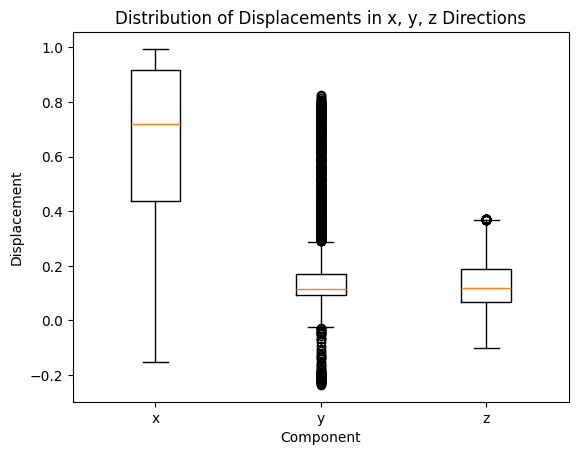

In [10]:
# Import libraries
import matplotlib.pyplot as plt

# Create box plot
plt.boxplot([disp_x, disp_y, disp_z], labels=['x', 'y', 'z'])

# Add labels and title
plt.xlabel('Component')
plt.ylabel('Displacement')
plt.title('Distribution of Displacements in x, y, z Directions')

# Show plot
plt.show()


#### Due to the above high variance in disp_x; y and z losses get stuck, and x keeps improving

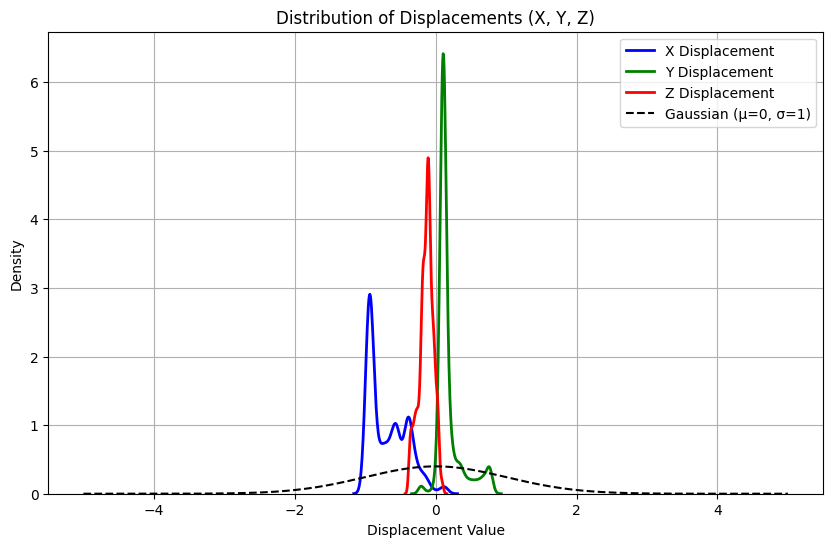

In [6]:


# Create a KDE plot for each distribution
plt.figure(figsize=(10, 6))

sns.kdeplot(disp_x, label='X Displacement', color='blue', linewidth=2)
sns.kdeplot(disp_y, label='Y Displacement', color='green', linewidth=2)
sns.kdeplot(disp_z, label='Z Displacement', color='red', linewidth=2)

# Add a Gaussian distribution for comparison (optional)
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1), '--', label='Gaussian (μ=0, σ=1)', color='black')

# Customize the plot
plt.title('Distribution of Displacements (X, Y, Z)')
plt.xlabel('Displacement Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()